In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split


In [3]:
class KNNclassifier:
    def __init__(self, k = 3 ,distance_func = None):
        self.k = k
        if distance_func is None:
            self.distance_func = self._euclidean_distance
        else:
            self.distance_func = distance_func
    def fit(self, X,y):
        self.X_train = X
        self.y_train = y

    def perdict(self, X):
        predictions = []
        for index ,x in enumerate(X):
            distances = [self.distance_func(x, x_train) for x_train in self.X_train]

            k_indices = np.argsort(distances)[:self.k]

            k_neighbor_labels = self.y_train[k_indices]

            counts = np.bincount(k_neighbor_labels.astype(int))
            predicted_label = np.argmax(counts)
            predictions.append(predicted_label)

        return np.array(predictions)
        




    def _euclidean_distance(self, x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def _manhatan_distance(self, x1, x2):
        return np.sum(np.abs(x1-x2))

    def _minkowski_distance(self, x1, x2, p=3):
        return np.sum(np.abs(x1 - x2)**p)**(1/p)





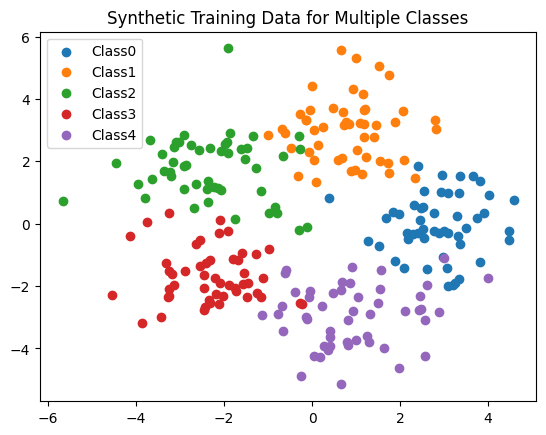

In [4]:
def generate_synthetic_data(m=3, num_points_per_calss= 100, cluster_std = 1.0):
    np.random.seed(42)
    X = []
    y = []
    means = []
    for i in range(m):
        angle = 2 *np.pi * i / m
        radius = 3
        mean = [radius *np.cos(angle), radius * np.sin(angle)]
        means.append(mean)
        cov = [[cluster_std, 0], [0, cluster_std]]
        class_data = np.random.multivariate_normal(mean, cov, num_points_per_calss)
        X.append(class_data)
        y += [i] * num_points_per_calss
    X = np.vstack(X)
    y = np.array(y)
    return X,y, means
m = 5
num_points_per_class = 50
cluster_std = 1.0

X, y, class_means = generate_synthetic_data(m = m,num_points_per_calss=num_points_per_class,cluster_std=cluster_std)
plt.Figure(figsize=(8,6))
colors = plt.colormaps['tab10'].colors
for i in range (m):
    plt.scatter(X[y==i,0], X[y==i , 1],color = colors[i], label = f'Class{i}')
plt.title('Synthetic Training Data for Multiple Classes')
plt.legend()
plt.show()


In [5]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,stratify=y, random_state=42)
print(f"Total samples: {X.shape[0]},Training sample:{X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Total samples: 250,Training sample:200, Testing samples: 50


In [6]:
def plot_decison_boundaries(classifier, X, y, means, title = "Decision Boundaries"):
    x_min, x_max = X[:,0].min() - 1, X[:, 0].max()+1
    y_min, y_max = X[:,1].min() - 1, X[:, 1].max()+1

    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.perdict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    colors = plt.get_cmap('tab10', np.unique(y).size + 1)

    plt.contourf(xx, yy, Z, alpha= 0.5, cmap= colors)
    plt.scatter(X[:,0],X[:, 1],c=y , cmap= colors, edgecolors= 'k',s=42)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(handles= [plt.Line2D([0],[0],marker="o",color='w',
                                    label = f'Class{i}',markeredgecolor=colors(i),
                                      markersize=10) for i in range(np.unique(y).size)],
                                        loc='upper right')


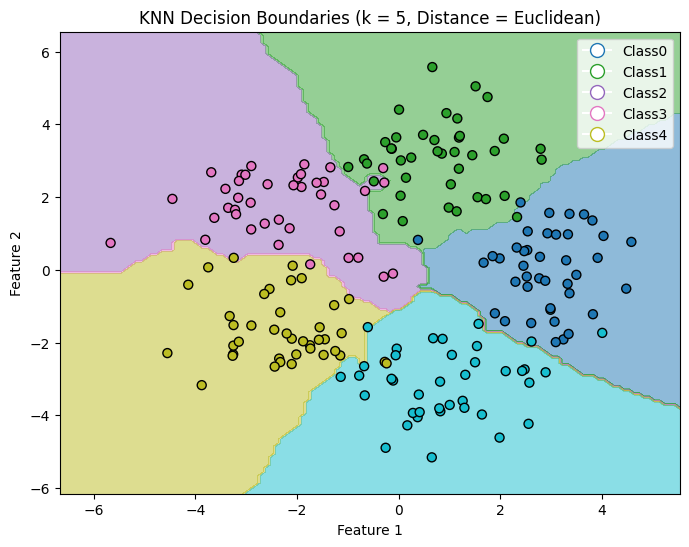

In [7]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def manhatan_distance(x1, x2):
    return np.sum(np.abs(x1-x2))

distance_func = euclidean_distance
k=5
# knn= KNNclassifier(k=k,distance_func=distance_func)
knn= KNNclassifier(k=k,distance_func=distance_func)
knn.fit(X_train,y_train)

plot_decison_boundaries(classifier=knn,
                        X=X_train,y=y_train,means=class_means,
                        title=f'KNN Decision Boundaries (k = {k}, Distance = Euclidean)')

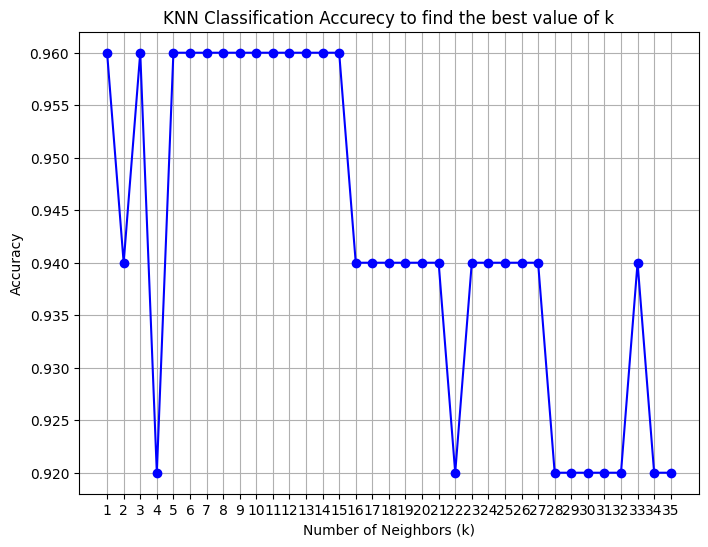

In [11]:
k_values = range (1,36)
accuracies = []
for k in k_values:
    knn = KNNclassifier(k=k,distance_func=None)
    knn.fit (X_train,y_train)
    y_pred = knn.perdict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies,marker="o", linestyle= '-',color="blue")
plt.title("KNN Classification Accurecy to find the best value of k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()
